# Floating Point Arithmetic

## 1. Representations of Integers and Floating Points Numbers

### 1.1 Representation of Unsigned Integers

Binary representation of (3-bit) integers:

$$ b_2b_1b_0 = b_2\,2^2 + b_1\,2^1 + b_0\,2^0. $$


- *Finite maximum and minimum integers.*

- Modern computers use $64$ bits but Julia provides smaller (and larger) integer types. Here are the unsigned integer types:

    |Type |Bits |Minimum |Maximum |
    |:- |--- | --- |---|
    |```UInt8``` | $8$ |$0$ | $2^8 - 1$|
    |```UInt16``` | $16$ |$0$ | $2^{16} - 1$|
    |```UInt32``` | $32$ |$0$ | $2^{32} - 1$|
    |```UInt64``` | $64$ |$0$ | $2^{64} - 1$|
    |```UInt128``` | $128$ |$0$ | $2^{128} - 1$|

In [1]:
x = UInt8(33)
@show x;
@show x==33;
@show bitstring(x); # Use bitstring to show the binary representation.

x = 0x21
x == 33 = true
bitstring(x) = "00100001"


### 1.2 Representation of Signed Integers : $2$'s Complement

**The negative of $x>0$ is encoded using $2$'s complement,
 $$-x := \overline{x} := \text{ flip all bits of } x \text{ and add } 1.$$**

- Example:  
    $6 = 00000110$,

    $-6 = \overline{6} = 11111001 + 1 = 11111010$.

In [2]:
x = Int8(6)
@show bitstring(x);
@show bitstring(-x);

bitstring(x) = "00000110"
bitstring(-x) = "11111010"


- Signed integer types in Julia:

    |Type |Bits |Minimum |Maximum |
    |:- |--- | --- |---|
    |```Int8``` | $8$ |$-2^7$ | $2^7 - 1$|
    |```Int16``` | $16$ |$-2^{15}$ | $2^{15} - 1$|
    |```Int32``` | $32$ |$-2^{31}$ | $2^{31} - 1$|
    |```Int64``` | $64$ |$-2^{63}$ | $2^{63} - 1$|
    |```Int128``` | $128$ |$-2^{127}$ | $2^{127} - 1$|

In [3]:
bitstring(Int8(0))

"00000000"

In [4]:
bitstring(Int32(40))

"00000000000000000000000000101000"

#### 1.2.1 Advantages of Two's Complement - Why Not Just Use a "Sign" Bit?

- *Avoids two representations of zero.*

In [5]:
x = 0;
@show bitstring(Int8(x));
@show bitstring(Int8(-x));

bitstring(Int8(x)) = "00000000"
bitstring(Int8(-x)) = "00000000"


- *Subtraction can be performed using the same hardware as addition*:
    $$x - y = x + \overline{y} \quad \text{(drop the leading ("overflow") bit)}.$$

    - Example: 
    $$
    \begin{align*}
    7 - 6 \,(\text{decimal})= & 7 + \overline{6}\,(\text{decimal}) \\
    = & 0000 \, 0111 + 1111 \, 1010 \,(\text{binary}) \\ 
    = & 1 \, 0000 \, 0001 \,(\text{binary}) \\ 
    = & 0000 \, 0001 \,(\text{drop the overflow bit, binary}).
    \end{align*}
    $$

In [6]:
x = 7;
y = 6;
@show bitstring(Int8(7) + Int8(-6));
@show bitstring(Int8(7-6));

bitstring(Int8(7) + Int8(-6)) = "00000001"
bitstring(Int8(7 - 6)) = "00000001"


### 1.3 Representation of Real Numbers

**Use a binary version of normalized scientific notation:
$ x = (-1)^S \times  (1.0+0.M) \times 2^E $.**

e.g. IEEE 754 32-bit (```Float32```): 

|Field |Size|Bits |
| :-- | :-: | :-: |
| Sign ($S$) | $1$ | $31$ |
| Exponent ($E + 127$) | $8$ | $23$ - $30$ |
| Mantissa ($M$) | $23$ | $0$ - $22$ |

**"Bias": if exponent is $E$, we store $E+127$ (for ```Float32```).**  *This makes comparisons easier.*
![Float32](files/images/590px-Float_example.png)

$0.15625 \, (decimial)\to ? \, (binary)$

$$
\begin{align*}
0.15625 \times 2 & = 0.3125 & \cdots 0 \\ 
0.3125 \times 2 & = 0.625 & \cdots 0 \\
0.625 \times 2 & = 0.25 & \cdots 1 \\ 
0.25 \times 2 & = 0.5 & \cdots 0 \\
0.5 \times 2 & = 0 & \cdots 1
\end{align*}
$$

Thus, $0.15625 \, (decimal) = 0.00101 \, (binary) = (-1)^0 \times (1 + 0.01) \, (binary)  \, \times 2^{-3} \,(decimal)$, which means $S = 0, M = 0.01 \underbrace{0\cdots0}_{21 \, 0's}, E \, (decimal) = -3 + 127 = 124$.

$124 \, (decimal) \to ? \, (binary)$ 

$$
\begin{align*}
124 \div 2 & = 62 & \cdots 0 \\ 
62 \div 2 & = 31 & \cdots 0 \\ 
31 \div 2 & = 15 & \cdots 1 \\ 
15 \div 2 & = 7 & \cdots 1 \\ 
7 \div 2 & = 3 & \cdots 1 \\
3 \div 2 & = 1 & \cdots 1 \\ 
1 \div 2 & = 0 & \cdots 1
\end{align*}
$$

Thus, $124 \, (decimal = 0111 \, 1100 \, (binary) = E$.

In [7]:
x = bitstring(Float32(0.15625));
println("S = ", x[1])
println("E = ", x[2: 9])
println("M = ", x[10: end])

S = 0
E = 01111100
M = 01000000000000000000000


#### 1.3.1Round-Off Errors

**Finite mantissae introduce errors when truncating real numbers whose binary expansion is longer than $23$ (```Float32```) or $52$ (```Float64```).**
 
 *The round-off error is a feature of the hardware and cannot be avoided.*

In [8]:
using Printf
a = Float64(0.1); 
b = Float64(0.2); 
c = Float64(0.3);
@printf("a = %.16e, b = %.16e, c = %.16e", a, b, c);

a = 1.0000000000000001e-01, b = 2.0000000000000001e-01, c = 2.9999999999999999e-01

Sometimes, round-off errors can lead to counter-intuitive behaviour:

In [9]:
@show a + b == c;

a + b == c = false


## 2. Floating Point Arithmetic

**Rules for adding two floating point numbers:**
1. **Rewrite the smaller number so its exponent matches that of the larger number.**
2. **Add the mantissae.**
3. **Normalise the sum.**
4. **Round the sum.**

## 3. Machine precision  

In [10]:
a = Float32(1.0); 
b = Float32(10.0^(-10));
@show a == 1.0;
@show b == 0;
@show a + b == a;

a == 1.0 = true
b == 0 = false
a + b == a = true


**The machine precision (or machine epsilon) is the smallest floating point number which when added to $1$ gives an answer larger than $1$.**

In Julia ```eps()``` gives the machine precision:

In [11]:
@show eps(Float32);
@show eps(Float64);

eps(Float32) = 1.1920929f-7
eps(Float64) = 2.220446049250313e-16


These values are $2.0^{-23}$ and $2.0^{-52}$, respectively.

## 3.3 Loss of Significance

**Subtraction of "nearby" numbers leads to [loss of significance](https://en.wikipedia.org/wiki/Loss_of_significance).**

Calculate sum and difference of 2 nearby numbers in 32-bit precision:

In [12]:
a32 = Float32(2.0) + Float32(3.0)^-12; b32 = Float32(2.0);
sum32 = a32+b32; diff32 = a32 - b32;
println("32 bit: a = ", a32, ", b = ", b32)
println("32 bit: sum = ", sum32,", difference = ", diff32 )

32 bit: a = 2.000002, b = 2.0
32 bit: sum = 4.000002, difference = 1.9073486e-6


Now calculate the same sum and difference in 64 bit precision:

In [13]:
a64 = Float64(2.0) + Float64(3.0)^-12; b64 = Float64(2.0);
sum64 = a64+b64; diff64 = a64 - b64;
println("64 bit: a = ", a64, ", b = ", b64)
println("64 bit: sum = ", sum64,", difference = ", diff64 )

64 bit: a = 2.000001881676423, b = 2.0
64 bit: sum = 4.000001881676424, difference = 1.8816764231210925e-6


We can treat the 64-bit answer as "exact" compared to the 32-bit answer and calculate the relative error in the 32-bit result:

In [14]:
relErrSum = abs(sum64-sum32)/sum64
relErrDiff = abs(diff64-diff32)/diff64
println("Sum relative error = ", relErrSum)
println("Difference relative error = ", relErrDiff)

Sum relative error = 6.41804929265656e-9
Difference relative error = 0.013643264790885564


## 4. Numerical Instability

**Iterative calculations can lose precision by accumulation of round-off errors**:

* Assuming inputs $\sim 1$, each FP addition introduces an error of $\sim \epsilon_m$.
* Might expect, after $n$ iterative steps, total error $\sim \sqrt{n}\, \epsilon_m$? (The process is like random walk, since the error can be either positive or negative.)

However, some iterations can produce total error $\sim e^n$ due to instability.

### 4.1 A Simple Example

Consider the following iterative procedures:

P1 : $a_{n+1} = \phi\,a_n$ with $a_0 = 1$,  

P2 : $a_{n+1} = a_{n-1} - a_{n}$ with $a_0 = 1$ and $a_1 = \phi$,

where $\phi = \frac{\sqrt{5}-1}{2}$.

Both have the exact solution: 
$$a_n = \phi^n.$$

However their numerical behaviour is very different for large $n$:

In [15]:
phi = Float32(0.5*(sqrt(5)-1)); n = 30
# Allocate some Float32 arrays
P1 = zeros(Float32, n); P2 = zeros(Float32, n);
# Set initial conditions
P1[1] = P2[1] = Float32(1.); P2[2] = phi;

In [16]:
for i in 2:n
    P1[i] = phi*P1[i-1]
end

In [17]:
for i in 3:n
    P2[i] = P2[i-2] - P2[i-1]
end

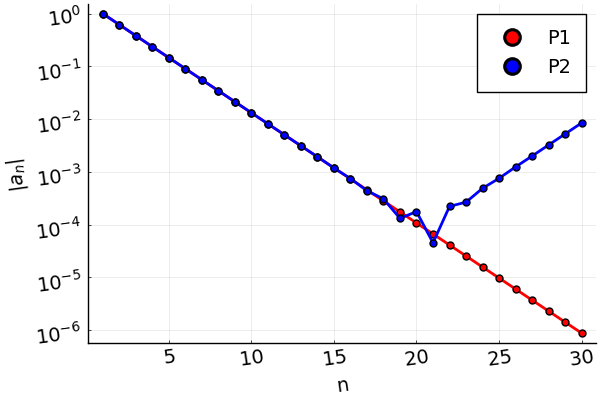

In [18]:
using Plots
using LaTeXStrings
pyplot()
# Set default fonts for all plots
fnt = Plots.font("DejaVu Sans", 8.0)
default(titlefont=fnt, guidefont=fnt, tickfont=fnt, legendfont=fnt)

plot(1:n, P1, yscale=:log10, label="", linewidth=2, linecolor=:red, xlabel="n", 
    ylabel=L"\left| a_n \right|")
scatter!(1:n, P1, markercolor=:red, label = "P1", markersize=5)
plot!(1:n, abs.(P2), label="", linewidth=2, linecolor=:blue)
scatter!(1:n, abs.(P2), markercolor=:blue, label = "P2", markersize=5)

What's going on? Due to round-off we have solved a different problem:

P2 : $a_{n+1} = a_{n-1} - a_{n}$ with $a_0 = 1$ and $a_1 = \phi + \varepsilon$.

The solution is
$$ a_n = \left( 1 + \frac{\sqrt{5}}{5} \epsilon \right) \phi^n - \frac{\sqrt{5}}{5} \epsilon \tilde{\phi}^n,$$
where $\tilde{\phi} =- \frac{\sqrt{5}+1}{2}$.  
Notice that $\left|\tilde{\phi}\right| > 1$. This is an unstable iteration.

#### 4.1.1 How to Solve A Linear Recurrence Relation

Suppose a two-ordered linear recurrence is
$$F_n = AF_{n-1} + BF_{n-2},$$
where $A$ and $B$ are real constant numbers.

The characteristic equation for the above relations is
$$x^2 - Ax - B = 0.$$

Let $x_1$ and $x_2$ be its solutions.

- $x_1, x_2 \in \mathbb{R}$ and $x_1 \neq x_2$:

    The general solution to the recurrence is 
    $$F_n = ax_1^n + bx_2^n,$$ 
    where $a,b \in \mathbb{R}$ are determined by the initial conditions.
   
- $x_1, x_2 \in \mathbb{R}$ and $x_1 = x_2 = x$:

    The general solution to the recurrence is 
    $$F_n = ax^n + bnx^n,$$
    where $a,b \in \mathbb{R}$ are determined by the initial conditions.
    
- $x_1, x_2 \in \mathbb{C}$ and $x_1 = \bar{x}_2$:

    Write $x_1$ and $x_2$ in their polar forms: suppose 
    $$
    \begin{cases}
        x_1 & = r\theta \\ 
        x_2 & = -r\theta 
    \end{cases}
    $$
    Then the general solution is 
    $$F_n = r^n [a\cos (n\theta) + b\sin (n\theta)],$$
    where $a, b \in \mathbb{R}$ are constants determined by the initial conditions.

#### 4.1.2 Solve the Example Problem

The characteristic equation of $a_{n+1} = a_{n-1} - a_n$ is 
$$x^2 + x - 1 = 0,$$
whose solutions are 
$$
\begin{cases}
x_1  = \frac{-1 + \sqrt{5}}{2} \\ 
x_2  = \frac{-1 - \sqrt{5}}{2} 
\end{cases}.
$$
Thus, the general solution to the recurrence is 
$$a_n = a \left( \frac{-1 + \sqrt{5}}{2} \right)^n + b \left(\frac{-1 - \sqrt{5}}{2} \right)^n.$$
By $a_0 = 1$ and $a_1 = \frac{\sqrt{5} - 1}{2} + \epsilon$, we know 
$$
\begin{cases}
a & = 1 + \frac{\sqrt{5}}{5} \epsilon \\ 
b & = - \frac{\sqrt{5}}{5} \epsilon
\end{cases}
$$
Thus, we have
$$
\begin{align*}
a_n & = \left( 1 + \frac{\sqrt{5}}{5} \epsilon \right) \left( \frac{-1 + \sqrt{5}}{2} \right)^n - \frac{\sqrt{5}}{5}\epsilon \left( \frac{-1 - \sqrt{5}}{2} \right)^n \\ 
& = \left( 1 + \frac{\sqrt{5}}{5} \epsilon \right) \phi^n - \frac{\sqrt{5}}{5} \epsilon \tilde{\phi}^n
\end{align*}
$$